<a href="https://colab.research.google.com/github/ronan777/HydroProc/blob/main/SyntheticsHydro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy import read_inventory
from obspy import read
import obspy.core.stream as st
import obspy.signal.cross_correlation as cc
import obspy.signal.filter as flt
import obspy.signal.trigger as trg
import obspy.signal.freqattributes as frq
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
import gc


✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



0 0.2939189189189189 1.8804054054054054
5 0.2939169302556826 1.8804112216663362
10 0.2939109645164632 1.880428670469238
15 0.29390102245251143 1.8804577518742573
20 0.2938871053156587 1.880498465981498
25 0.2938692148578253 1.8805508129307016
30 0.2938473533304002 1.8806147929008605
35 0.2938215234834211 1.8806904061097087
40 0.2937917285645873 1.8807776528131037
45 0.29375797231809037 1.8808765333043016
50 0.29372025898325155 1.8809870479131012
55 0.2936785932930274 1.8811091970049243
60 0.29363298047228026 1.8812429809797313
65 0.29358342623591327 1.8813884002708632
70 0.29352993678682493 1.8815454553437745
75 0.2934725188136918 1.8817141466946556
80 0.29341117948856726 1.8818944748489432
85 0.2933459264643401 1.8820864403597515
90 0.2932767678719928 1.8822900438061676
95 0.29320371231772335 1.882505285791484
100 0.2931267688798944 1.8827321669413102
105 0.2930459471058146 1.8829706879015924
110 0.2929612570083771 1.8832208493365479
115 0.292872709062523 1.8834826519264887
120 0.2927

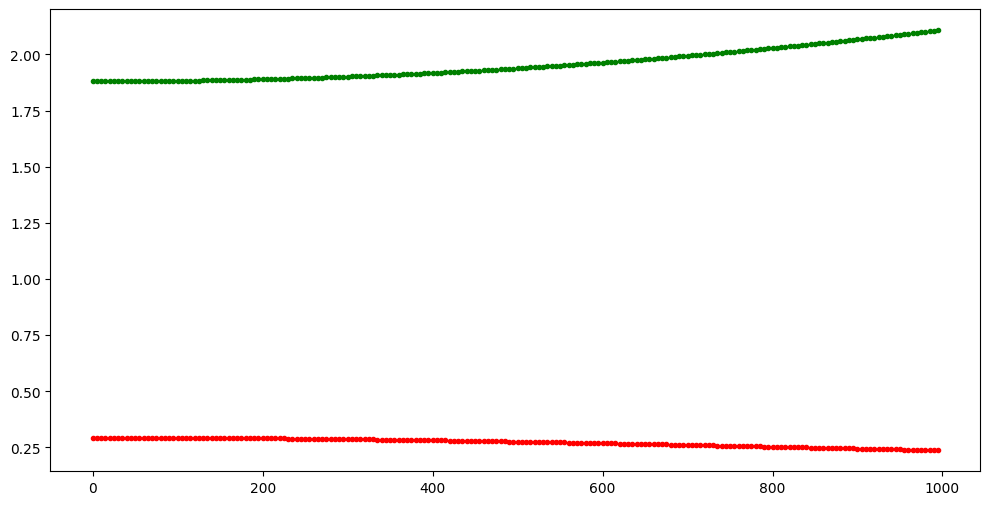

0.0 0.2762559023008366 1.9375783266656483
1.0 0.2762322849971989 1.9376457182543618
2.0 0.2762086215932149 1.9377132286949696
3.0 0.27618491197254946 1.937780858267348
4.0 0.27616115601851493 1.937848607252203
5.0 0.27613735361406827 1.9379164759310732
6.0 0.27611350464181095 1.9379844645863313
7.0 0.2760896089839858 1.9380525735011878
8.0 0.2760656665224775 1.9381208029596955
9.0 0.27604167713881084 1.938189153246751
10.0 0.27601764071414897 1.9382576246480958
11.0 0.2759935571292927 1.9383262174503246
12.0 0.2759694262646793 1.9383949319408842
13.0 0.2759452480003806 1.9384637684080777
14.0 0.2759210222161029 1.9385327271410675
15.0 0.27589674879118337 1.9386018084298786
16.0 0.2758724276045919 1.938671012565402
17.0 0.27584805853492766 1.9387403398393983
18.0 0.2758236414604178 1.9388097905444979
19.0 0.2757991762589172 1.938879364974208
20.0 0.2757746628079067 1.9389490634229136
21.0 0.27575010098449115 1.9390188861858815
22.0 0.27572549066539964 1.9390888335592633
23.0 0.275700831

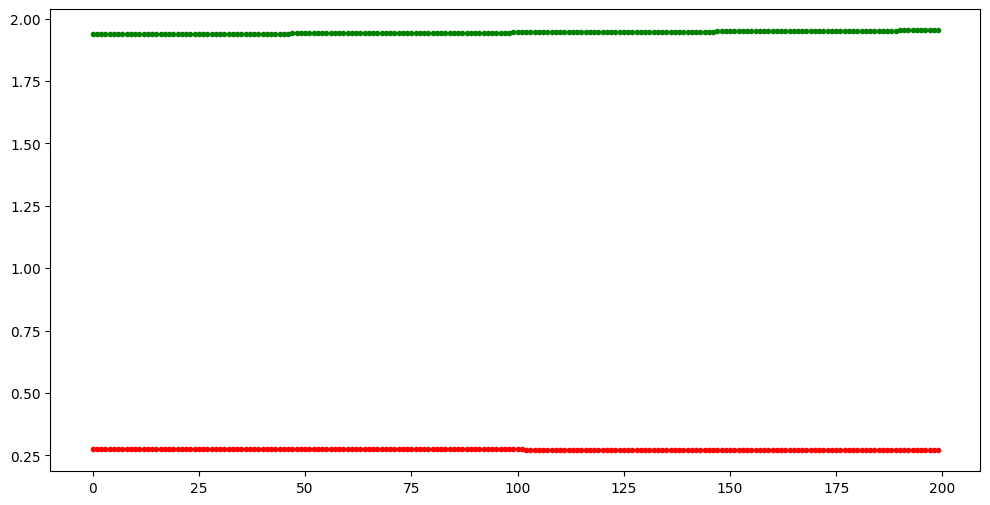

In [13]:
#
#
#
#
# Define functions to be used by several modules to model relection times
#
def ReflectionsTimes(Bath, Whale, Sensor, Offset, Wvel):
  theta = math.atan(Offset/(2.*Bath-Sensor-Whale))
  if (Offset == 0):
    alpha = math.pi/2.
    diff1 = (2*Bath-Sensor-Whale)/math.cos(theta) - Bath + Whale
    diff2 = (4*Bath-Sensor-Whale)/math.cos(theta) - Bath + Whale
  else :
    alpha = math.atan((Bath-Whale)/Offset)
    diff1 = (2*Bath-Sensor-Whale)/math.cos(theta) - Offset/math.cos(alpha)
    diff2 = (4*Bath-Sensor-Whale)/math.cos(theta) - Offset/math.cos(alpha)
  dt1 = diff1/Wvel
  dt2 = diff2/Wvel
  return dt1, dt2
#
#
Bath = 1174
Sensor = 739
Whale = 15
hvel = 1480
fig, ax = plt.subplots(figsize=(12, 6), )
for i in range(200):
  Offset = i*5
  dt1, dt2 = ReflectionsTimes(Bath, Whale, Sensor, Offset, hvel)
  print(Offset, dt1, dt2)
  plt.plot(Offset,dt1,'r.', Offset,dt2,'g.')
plt.show()
fig, ax = plt.subplots(figsize=(12, 6), )
for i in range(200):
  Offset = 500
  Whale = i*1.
  dt1, dt2 = ReflectionsTimes(Bath, Whale, Sensor, Offset, hvel)
  print(Whale, dt1, dt2)
  plt.plot(Whale,dt1,'r.', Whale,dt2,'g.')
plt.show()



[link text](https://)